In [1]:
from snn import SNN, Entity, Relation
from keras.layers import Input, Dense
from keras.models import Model
from snn.utils import draw

Using TensorFlow backend.


In [2]:
Thing = Entity("Thing")
Person = Entity("Person", Thing)
Object = Entity("Object", Thing)

In [3]:
hold = Relation("hold", Person, Object)
look = Relation("look", Person, Object)

In [4]:
x = Input(shape=(100,))
snn = SNN(entities=[Thing, Person, Object], relations=[hold, look])
y = snn(x)
z = Dense(units=10, activation='softmax')(y)

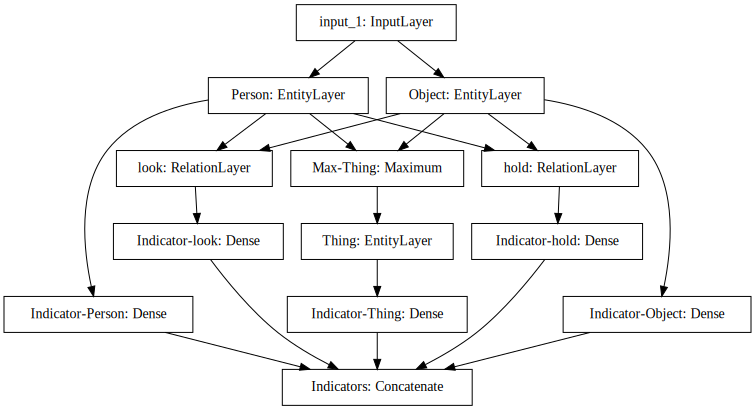

In [5]:
snn_model = snn.build()
snn_model.compile(optimizer='adam', loss='binary_crossentropy')
draw(snn_model)

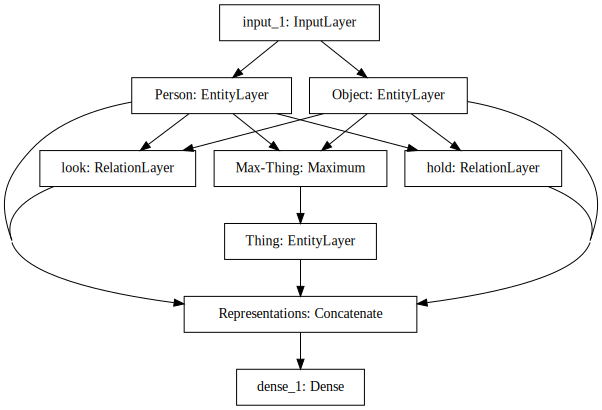

In [6]:
full_model = Model(inputs=x, outputs=z)
full_model.compile(optimizer='adam', loss='categorical_crossentropy')
draw(full_model)